# Tree-Based Predictive Modeling Assignment

## 1. Introduction
In this notebook, we will develop tree-based predictive models using the **California Housing Dataset**.
We will implement Decision Tree, Random Forest, AdaBoost, and Gradient Boosting (XGBoost) models to predict median house values.

### Objectives:
- Load and explore the dataset.
- Visualize feature distributions and correlations.
- Train and evaluate multiple tree-based models.
- Compare model performance using RMSE, MAE, and R² scores.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

## 2. Dataset Loading and Preprocessing
We use the California Housing dataset, which contains data on housing in California districts.

In [10]:
print("Loading California Housing dataset...")
california = fetch_california_housing(as_frame=True)
df = california.frame
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

print(f"Dataset shape: {df.shape}")
print("Features:", list(X.columns))
df.head()

Loading California Housing dataset...
Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Exploratory Data Analysis (EDA)
We visualize the distribution of the target variable and features, and check for correlations.

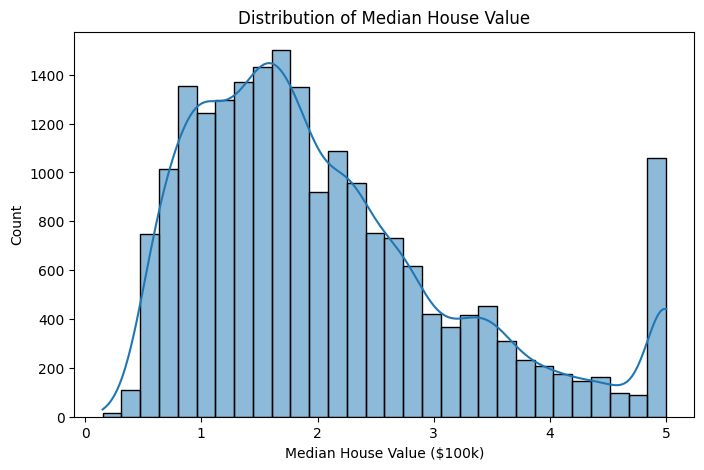

In [11]:
# Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100k)')
plt.show()

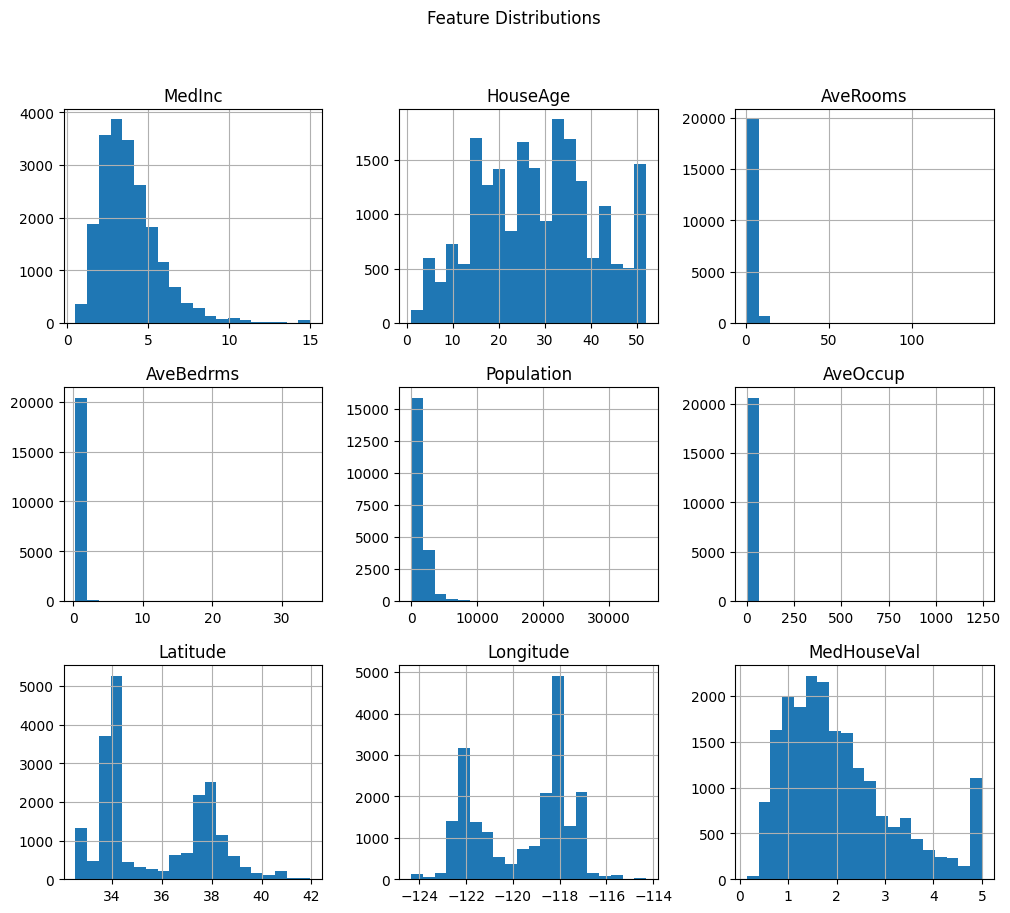

In [12]:
# Feature Distributions
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

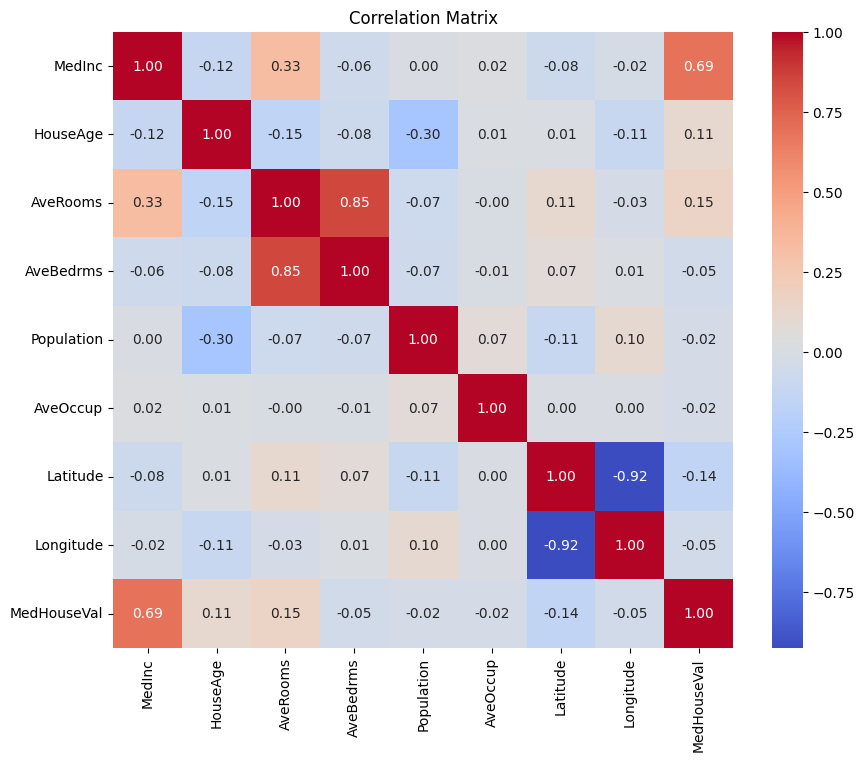

In [13]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 4. Model Development
We will split the data into training and testing sets (80/20 split) and train four models:
1. Decision Tree
2. Random Forest
3. Gradient Boosting (sklearn)
4. AdaBoost
5. XGBoost (Extreme Gradient Boosting)

In [14]:
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

results = []

print("Training models...")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

results_df = pd.DataFrame(results)
results_df

Splitting data...
Training models...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training AdaBoost...
Training XGBoost...


,Model,RMSE,MAE,R2
0,Decision Tree,0.724234,0.522259,0.599732
1,Random Forest,0.505340,0.327543,0.805123
2,Gradient Boosting,0.542215,0.371643,0.775645
3,AdaBoost,0.783887,0.649788,0.531079
4,XGBoost,0.471794,0.309573,0.830137


## 5. Visualizations
We visualize the Feature Importance from the Random Forest model and the structure of the Decision Tree.

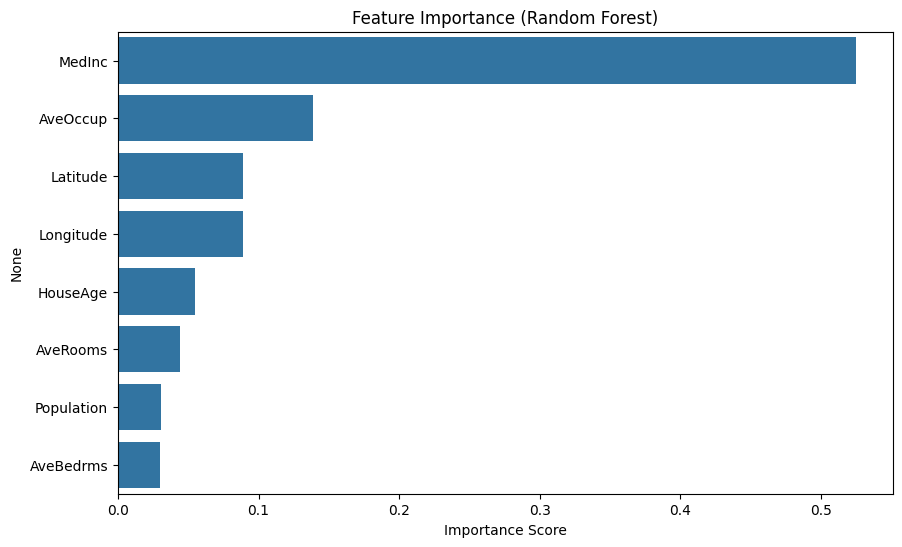

In [15]:
# Feature Importance (Random Forest)
rf_model = models["Random Forest"]
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

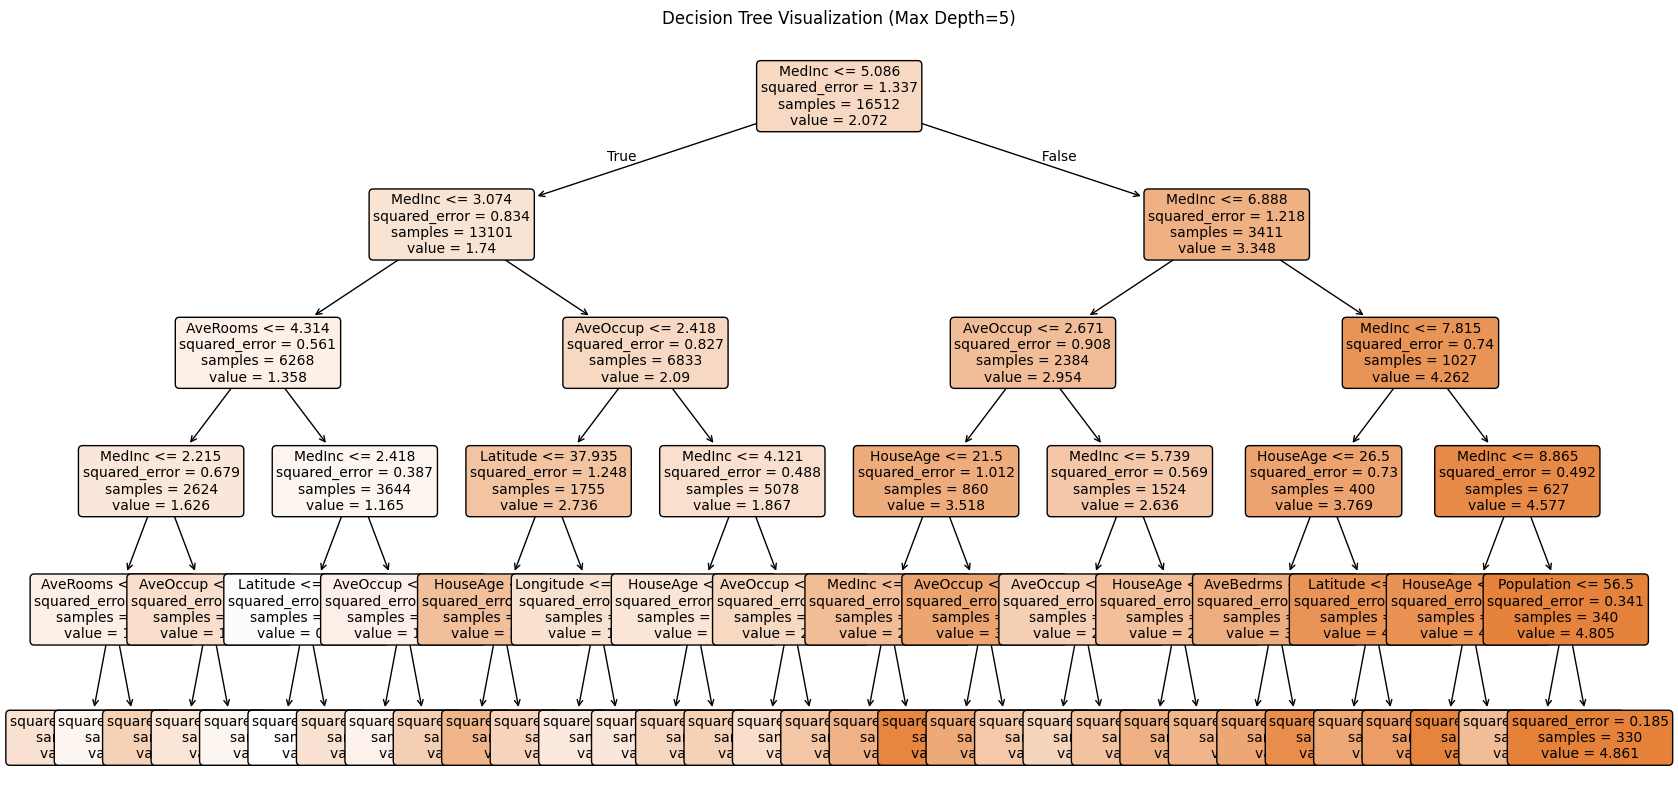

In [16]:
# Decision Tree Visualization (limited depth for readability)
dt_model = models["Decision Tree"]
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=list(X.columns), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization (Max Depth=5)')
plt.show()